In [2]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

## Q11. What time do you spend the most time on data science job?

In [3]:
mcq = pd.read_csv('multipleChoiceResponses.csv',
 encoding="ISO-8859-1", low_memory=False)

time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



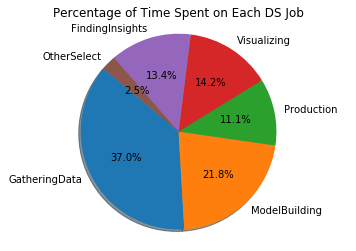

In [4]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()
    
tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

## Q11. What are the most important factors to consider when looking for a data science job?

In [5]:
question = pd.read_csv('schema.csv')
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [6]:
job_factors =[x for x in mcq.columns if x.find('JobFactor') != -1]

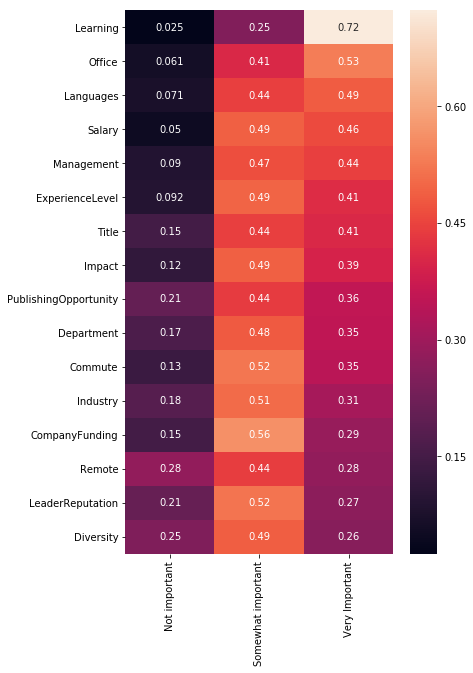

In [7]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a
    
jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

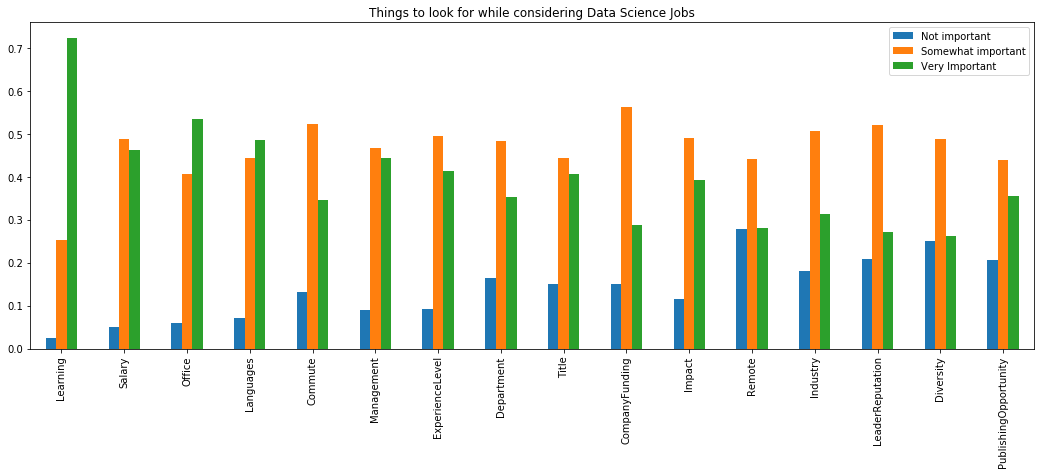

In [8]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.show()

## Q12. Is a degree important to becoming a data scientist?

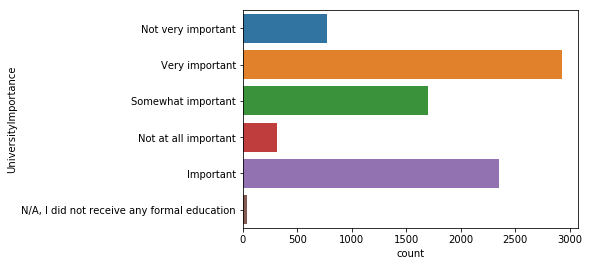

In [9]:
sns.countplot(y='UniversityImportance', data=mcq)

In [12]:
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

## Q13. Where do you start data science?

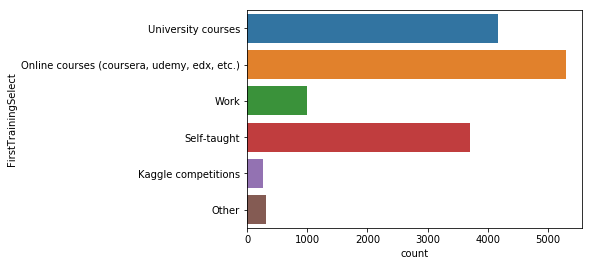

In [13]:
sns.countplot(y='FirstTrainingSelect', data = mcq)

## Q14. What is the most important thing about data scientist resume?

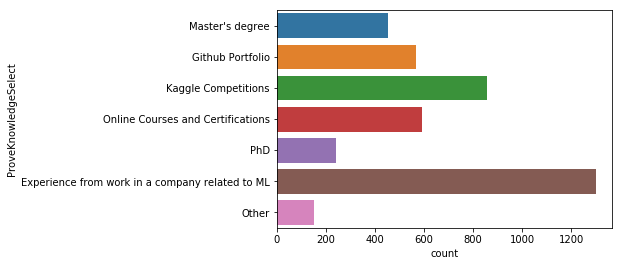

In [15]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

## Q15. Do you need math to use machine learning algorithms?

In [16]:
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [18]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

## Q16. Where should I find work?

In [19]:
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


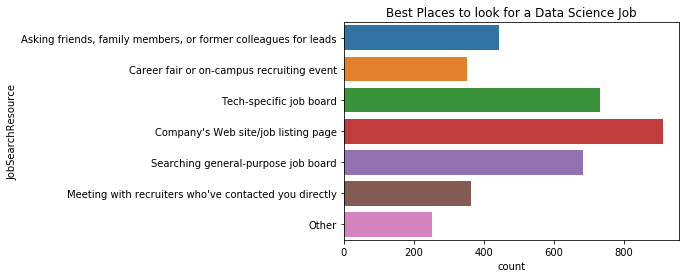

In [20]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

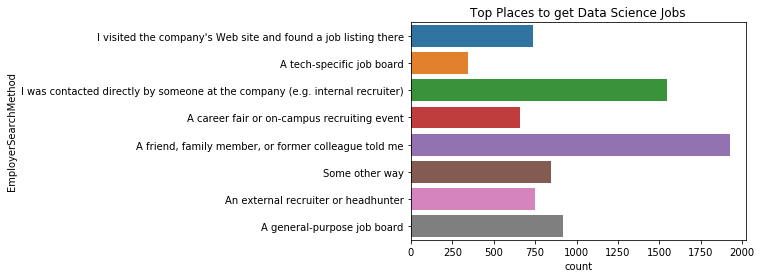

In [21]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

# Korea

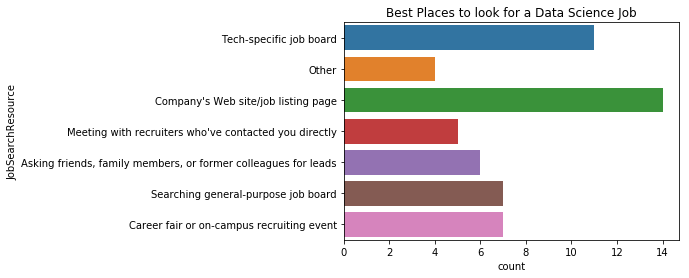

In [23]:
plt.title("Best Places to look for a Data Science Job")
korea = mcq.loc[(mcq['Country']=='South Korea')]
sns.countplot(y='JobSearchResource', data=korea)


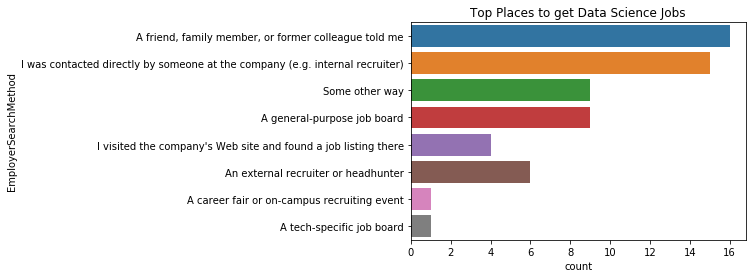

In [24]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)